<a href="https://colab.research.google.com/github/joymuli10/Nairobi_hospital_hypothyroidsm_test/blob/master/Copy_of_Hypothyroidsm_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## a). Specifying the Question



> Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



## b). Defining the Metric for Success



> This project will be considered a success when we are able to develop a reliable prediction model that has the best score.



## c). Understanding the Context



> Nairobi hospital is a not for profit organization that deals with several conditions including hypothroidsm. Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones. The signs and symptoms of hypothyroidism vary, depending on the severity of the hormone deficiency. The signs are but not limited to Fatigue, increased sensitivity to cold, Constipation, Dry skin, Weight gain, Puffy face, Muscle weakness,Elevated blood cholesterol level Muscle aches, tenderness and stiffness, Pain, stiffness or swelling in your joints and Enlarged thyroid gland (goiter).

Hypothyroidsm is caused by several factors including; autoimmune diseases, Over-response to hyperthyroidism treatment, Thyroid surgery, Radiation therapy and Medications. Although anyone can develop hypothyroidism, you're at an increased risk if you: are a woman, above 60, have had hypothyroid surgery among others. Hypothyroidsm does not show over time but once discovered is treatable.

The data set to be used was provided by Nairobi hospital and contains features that are important in knowing whether or not someone might have hypothyroidism. Some of the features are sex, age, tumor, pregnant, surgery among others.



## d). Recording the experimental design



> Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

1. Load data and preview data
2. Data Cleaning
3. Exploratory Analysis
4. Implementing the Solution
5. Challenging the Solution
6. Follow Up Question



## Appropriateness of the data



> The data to be used is provided by Nairobi hospital. It has 3163 Rows and 26 Columns.



# Reading the Data

In [268]:
#Importing the libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [269]:
#Loading the dataset
df_health = pd.read_csv("/content/hypothyroid.csv")

# Checking the data

In [270]:
#Previewing the dataset's head
df_health.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [271]:
#Checking the dataset's bottom
df_health.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [272]:
#Checking the number of columns and rows
print('Hypothyroidsm dataset shape: {} Rows, {} Columns'.format(*df_health.shape))

Hypothyroidsm dataset shape: 3163 Rows, 26 Columns


In [273]:
#Checking the info to see how many non nulls we have the respectve data types of each column
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas



> All the columns are of the string data type. This will be dealt with later as as modeling requires integer values.



# Cleaning the data

In [274]:
#Checking if there are missing values
df_health.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64



> There are no missing values.



In [275]:
#Dropping any duplicates
df_health = df_health.drop_duplicates()

In [276]:
#Making all the columns lower cased for uniformity reasons
df_health.columns = df_health.columns.str.lower()

#Previewing to see if they're all uniform
df_health.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [277]:
# Checking for the number of unique values in each column

for column in df_health.columns:
  print(column)
#  print(df_health[column].nunique())
  print(df_health[column].unique())
  print('\n')

status
['hypothyroid' 'negative']


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


sex
['M' 'F' '?']


on_thyroxine
['f' 't']


query_on_thyroxine
['f' 't']


on_antithyroid_medication
['f' 't']


thyroid_surgery
['f' 't']


query_hypothyroid
['f' 't']


query_hyperthyroid
['f' 't']


pregnant
['f' 't']


sick
['f' 't']


tumor
['f' 't']


lithium
['f' 't']


goitre
['f' 't']


tsh_measured
['y' 'n']


tsh
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35



> 



In [278]:
#There are 3 unique values in the column sex - M, F, ?
#There is also ? on tbg

#Replacing the ? with nan
df_health.replace('?', np.nan, inplace=True)

In [279]:
#Checking if it worked
df_health['sex'].unique()

#Yes, it worked. Now to deal with them

array(['M', 'F', nan], dtype=object)

In [280]:
#Checking if they're missing values
df_health.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

In [281]:
# Checking for missing values as a percentage
(df_health.isna().mean().round(4) * 100).sort_values() 

status                        0.00
fti_measured                  0.00
t4u_measured                  0.00
tt4_measured                  0.00
t3_measured                   0.00
tsh_measured                  0.00
goitre                        0.00
tbg_measured                  0.00
tumor                         0.00
sick                          0.00
lithium                       0.00
query_hyperthyroid            0.00
query_hypothyroid             0.00
thyroid_surgery               0.00
on_antithyroid_medication     0.00
query_on_thyroxine            0.00
on_thyroxine                  0.00
pregnant                      0.00
sex                           2.37
fti                           7.71
t4u                           7.74
tt4                           7.78
age                          14.19
tsh                          14.74
t3                           22.03
tbg                          91.87
dtype: float64

In [282]:
# Changing column datatypes to their appriopriate datatypes
# There are numerical, categorical and boolean 
# Numerical columns list
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

# Categorical columns list
cat_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',
            't4u_measured', 'fti_measured', 'tbg_measured']

# Boolean columns list
bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# Replacing bool columns with True or False value
#
for column in bool_cols:
  df_health[column] = df_health[column].replace('f', False)
  df_health[column] = df_health[column].replace('t', True)
  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in df_health.columns:
  if column in num_cols:
    df_health[column] = df_health[column].astype('float')
  elif column in cat_cols:
    df_health[column] = df_health[column].astype('category')
  elif column in bool_cols:
    df_health[column] = df_health[column].astype('bool')

In [283]:
# Previewing the column datatypes to check whether the changes have been effected
#
df_health.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
tbg                            object
dtype: objec

In [284]:
# Dropping the tbg column since it has a very high percentage of missing values.
df_health.drop(['tbg'], axis = 1, inplace = True)

In [285]:
# Filling missing values in the sex column with mode
df_health.sex.fillna(df_health.sex.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
for column in num_cols:
  df_health[column].fillna(df_health[column].mean(), inplace = True)

In [286]:
# Checking whether the missing values have been filled appriopriately
#
df_health.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
dtype: int64



> So far I have dealt with the missing values and made sure that each column has the required data type.



# Exploratory Analysis



> **Univariate Analysis**



In [287]:
#Showing the relationship between sex and status
sex_mean = df_health.groupby(['sex', 'status'] )['tsh'].mean().unstack(1)
sex_mean

status,hypothyroid,negative
sex,,
F,67.106340,3.274344
M,59.952703,2.209360




> There's a positive relationship between the sex of a person and whether or not he has hypothyroidsm



In [293]:
df_health.groupby('status')['sex'].value_counts()

status       sex
hypothyroid  F       104
             M        37
negative     F      2088
             M       857
Name: sex, dtype: int64

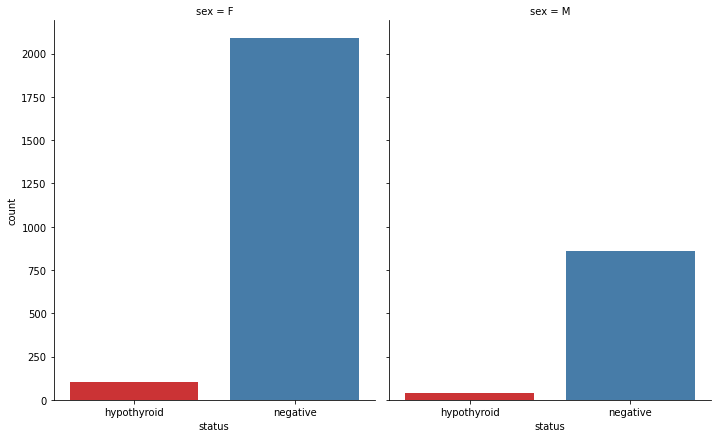

In [288]:
# Plotting bar charts
sns.catplot("status", col="sex", col_wrap=4, data=df_health, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()



> The data is imbalanced as most results are negative. The bar chart also shows that more women have gone for hypothyroidsm test hence more have tested positive.



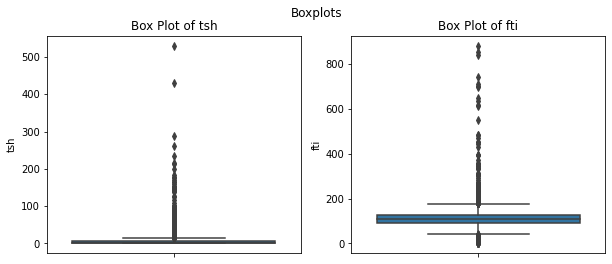

In [289]:
import matplotlib.pyplot as plt

# Plotting boxplots to check for outliers
fig, ax = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Boxplots')
sns.boxplot(data=df_health, y = "tsh", ax=ax[0])
ax[0].set_title('Box Plot of tsh')
sns.boxplot(data=df_health, y = "fti", ax=ax[1])
ax[1].set_title('Box Plot of fti')

plt.show()

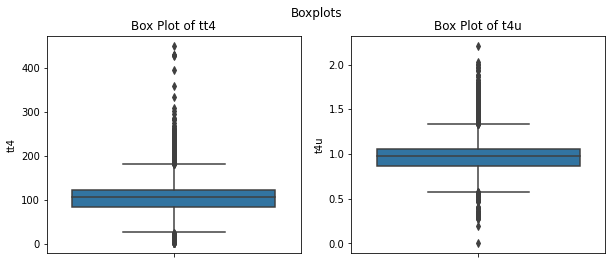

In [290]:
# Plotting boxplots to check for outliers
fig, ax = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Boxplots')
sns.boxplot(data=df_health, y = "tt4", ax=ax[0])
ax[0].set_title('Box Plot of tt4')
sns.boxplot(data=df_health, y = "t4u", ax=ax[1])
ax[1].set_title('Box Plot of t4u')

plt.show()

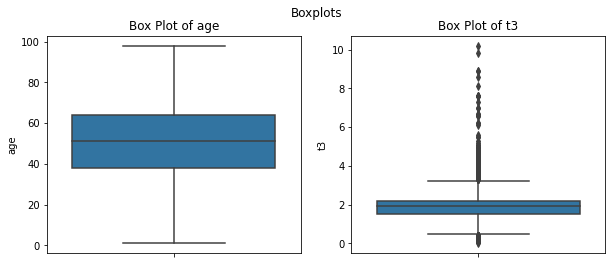

In [291]:
# Plotting boxplots to check for outliers
fig, ax = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Boxplots')
sns.boxplot(data=df_health, y = "age", ax=ax[0])
ax[0].set_title('Box Plot of age')
sns.boxplot(data=df_health, y = "t3", ax=ax[1])
ax[1].set_title('Box Plot of t3')

plt.show()

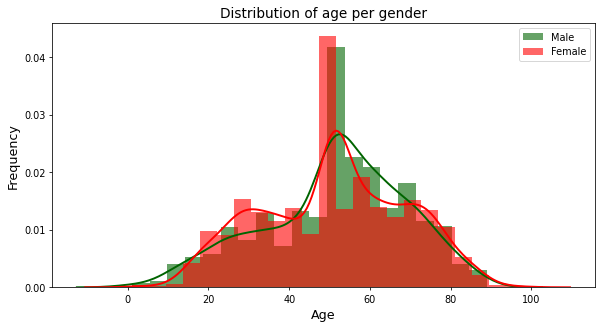

In [292]:
# Plotting histogram to show distribution of age per gender
# 
male = df_health.loc[df_health.sex=='M', 'age']    
female = df_health.loc[df_health.sex=='F', 'age']  

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(10,5), dpi= 70)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="red", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'black')
plt.xlabel('Age', fontsize = 13, color = 'black')
plt.ylabel('Frequency', fontsize = 13, color = 'black')
plt.legend()
plt.show()



> Ages of both men and women are skewed to the left.



In [294]:
#Describing the columns
df_health.describe()

,age,tsh,t3,tt4,t4u,fti
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [295]:
#Creating a new dataset so that I could plot a pairplot of the numerical columns
df_num = df_health[['age', 'tsh', 't3', 'tt4', 't4u', 'fti']]

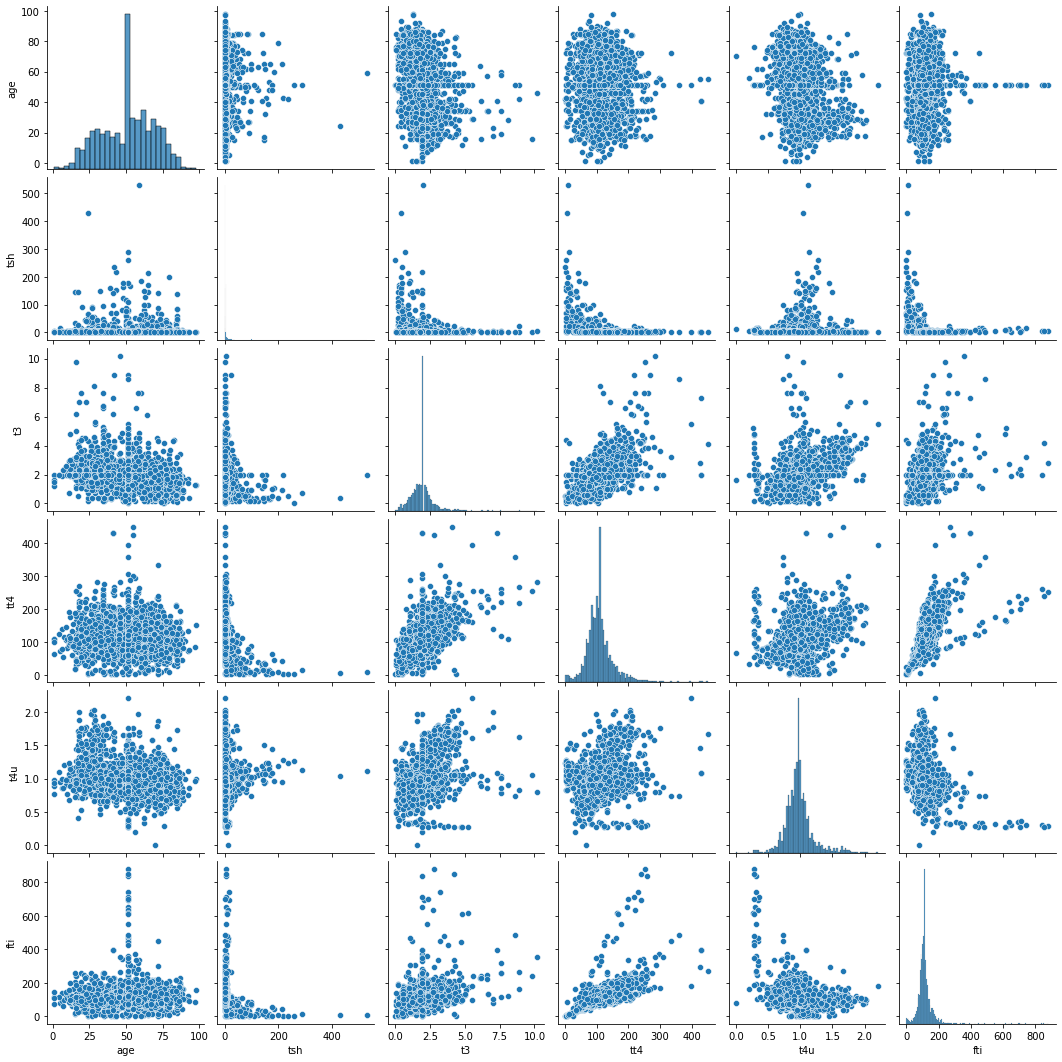

In [296]:
#Plotting a pairplot
sns.pairplot(df_num)
plt.show()

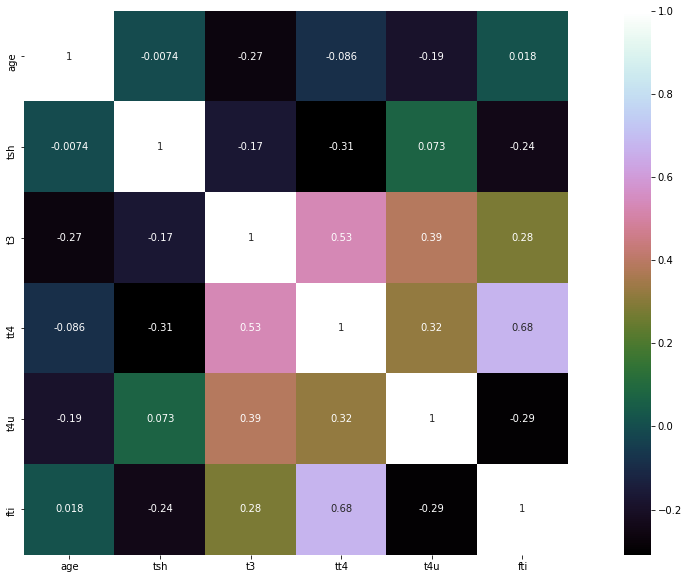

In [297]:
#Plotting a heatmap to see the correlation
corr_mat=df_num.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')



> There is a negative reelation between fti and tsh, fti and t4u, tt4 and tsh, t3 and age, age and t4u.

> There is a strong positive relation between tt4 and fti, tt4 and t3





# Modeling



> Now I'm going to predict whether a patient has hypothyroidsm by performing supervised learning algorithms on the dataset. The models to be used are Decision Trees (Random forest and Gradient boost) and Support Vector Machine (Linear, polynomial and rbf kernel). First, I'll be encoding the columns then I'll divide them into the target and feature variables before implementing the models. 





> Having a recap of the question. 
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



In [298]:
#Converting the string data types to values so that we could use them in modelling
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

df_health['status'] = en.fit_transform(df_health['status'])
df_health['fti_measured'] = en.fit_transform(df_health['fti_measured'])

#df_health['sex'] = en.fit_transform(df_health['sex'])
df_health['on_thyroxine'] = en.fit_transform(df_health['on_thyroxine'])

df_health['query_on_thyroxine'] = en.fit_transform(df_health['query_on_thyroxine'])
df_health['on_antithyroid_medication'] = en.fit_transform(df_health['on_antithyroid_medication'])

df_health['thyroid_surgery'] = en.fit_transform(df_health['thyroid_surgery'])
df_health['query_hypothyroid'] = en.fit_transform(df_health['query_hypothyroid'])

df_health['query_hyperthyroid'] = en.fit_transform(df_health['query_hyperthyroid'])
df_health['pregnant'] = en.fit_transform(df_health['pregnant'])

df_health['sick'] = en.fit_transform(df_health['sick'])
df_health['tumor'] = en.fit_transform(df_health['tumor'])

df_health['lithium'] = en.fit_transform(df_health['lithium'])
df_health['goitre'] = en.fit_transform(df_health['goitre'])

df_health['tsh_measured'] = en.fit_transform(df_health['tsh_measured'])
df_health['t3_measured'] = en.fit_transform(df_health['t3_measured'])

df_health['tt4_measured'] = en.fit_transform(df_health['tt4_measured'])
df_health['t4u_measured'] = en.fit_transform(df_health['t4u_measured'])
df_health['tbg_measured'] = en.fit_transform(df_health['tbg_measured'])
df_health.head()

#The sex column could not be encoded and so I''ll have to use get dummies

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,0,72.0,M,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,F,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,M,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,0,24.0,F,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,0,77.0,M,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


In [299]:
#Checking the unique values for each column
for column in df_health.columns:
  print(column)
  print(df_health[column].unique())
  print('\n')

status
[0 1]


age
[72.         15.         24.         77.         85.         64.
 20.         42.         69.         75.         53.         59.
 68.         50.         78.         65.         28.         43.
 40.         84.         51.11253776 83.         63.         73.
 36.         27.         48.         71.         60.         34.
 79.         62.         74.         32.         41.         70.
 29.          5.         58.         35.         51.         22.
 16.         44.         39.         47.         18.         17.
 88.         56.         30.         45.         66.         52.
 54.         80.         33.         38.         92.         67.
 46.         13.         89.         61.         49.         26.
 57.         31.         90.         81.         25.         37.
 76.         87.         23.         55.         86.         98.
 21.         97.          1.          6.         14.         82.
 11.         19.          9.         12.         10.          8.
  7.  

In [300]:
#Converting gender
gender = pd.get_dummies(df_health['sex'],drop_first=True)
gender.head()

,M
0,1
1,0
2,1
3,0
4,1


In [301]:
gender.value_counts()

M
0    2192
1     894
dtype: int64

In [302]:
gender = gender.rename(columns={'M' : 'sex'})

In [303]:
df_health.drop(['sex'],axis=1,inplace=True)

In [304]:
#Putting the encoded sex column back
df_final = pd.concat([df_health,gender],axis=1)
df_final.head()

# Now we have a dataset with all the variables in the correct format!

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,sex
0,0,72.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,1
1,0,15.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0
2,0,24.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,1
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0
4,0,77.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,1


In [305]:
# #There are several columns that have integer values but their data types are still strings
# #Let's convert them to integers
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

for column in df_final.columns:
   if column in num_cols:
     df_final[column] = df_final[column].astype('float')
 

In [306]:
# Let's now convert the float values to integers
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

for column in df_final.columns:
  if column in num_cols:
    df_final[list(num_cols)] = df_final[list(num_cols)].fillna(0.0).astype('int')

#I used this code to convert the values to integers and also deal with the missing values in the columns

In [307]:
#There are several columns that have integer values but their data types are still strings
#Let's convert them to integers
num_cols = ['sex']

for column in df_final.columns:
  if column in num_cols:
    df_final[column] = df_final[list(num_cols)].astype('int')

In [308]:
df_final.dtypes

status                       int64
age                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
tsh_measured                 int64
tsh                          int64
t3_measured                  int64
t3                           int64
tt4_measured                 int64
tt4                          int64
t4u_measured                 int64
t4u                          int64
fti_measured                 int64
fti                          int64
tbg_measured                 int64
sex                          int64
dtype: object

# Decision Tress

## Random Forest

In [309]:
# Now that all our columns are integers, we can start 

# Split the independent and dependent variables
y = df_final['status'].values #This is our target variable. It's either 0 or 1 which represents whether or not someone has hypothyroidsm

test_features = df_final.columns.to_list() #These are the independent variables 
test_features.remove('status')
X = df_final[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [310]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.958811
std,0.197179,0.181476
min,0.000000,0.009972
25%,1.000000,0.999850
50%,1.000000,0.999850
75%,1.000000,0.999850
max,1.000000,0.999850


In [311]:
#Checking how the score of the model
forest.score(X_test, y_pred)

1.0

In [312]:
#Assessing the model
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.012226609664580463
Mean Squared Error: 0.005614634430643004
Root Mean Squared Error: 0.07493086433935621


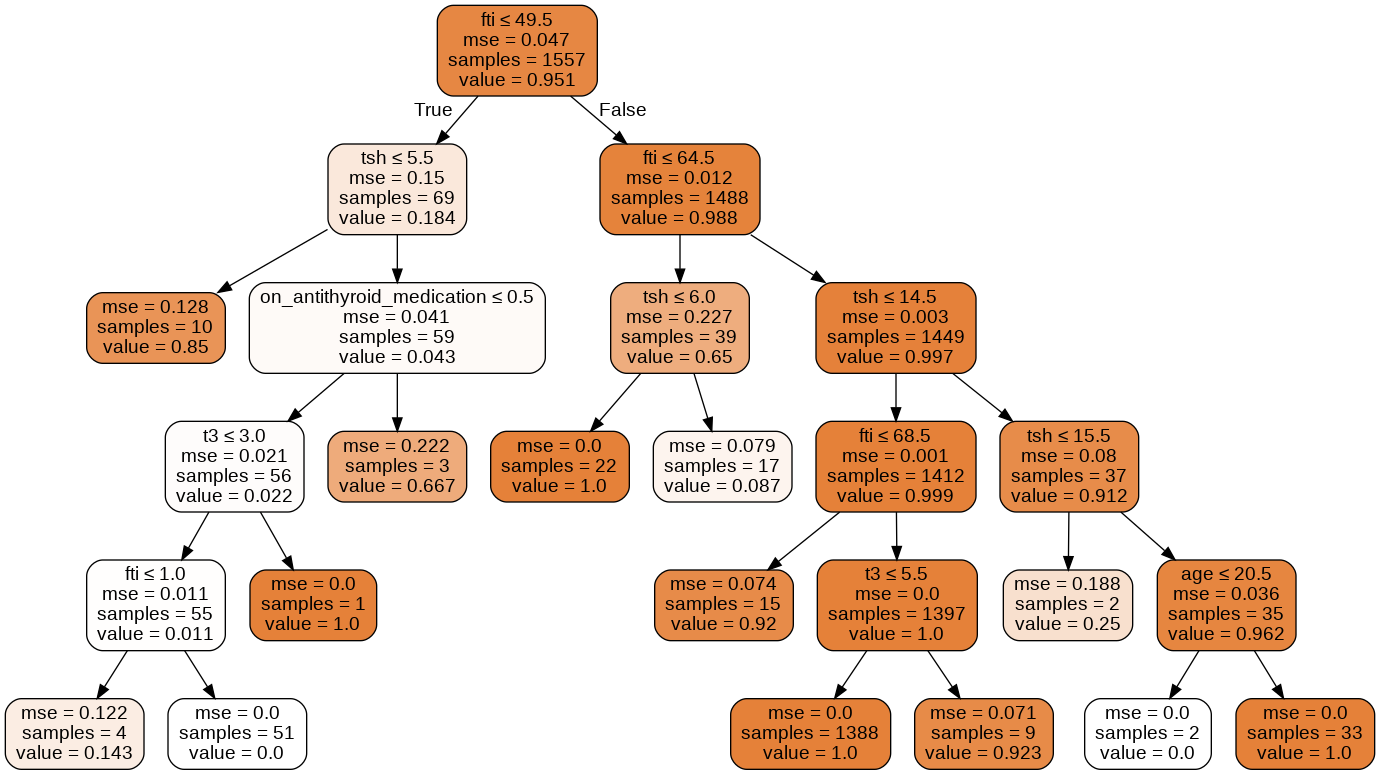

In [313]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('termdeposit_forest.png')
Image(graph.create_png())

In [314]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# sort the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: fti                  Importance: 0.73
Variable: tsh                  Importance: 0.23
Variable: age                  Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: t3                   Importance: 0.01
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: tsh_measured         Importance: 0.0
Variable: t3_measured          Importance: 0.0
Variable: tt4_measured         Importance: 0.0
Variable: tt4                  Importance: 0.0
Variable: t4u_measured         Importance: 0.0
Variable: t4u                  Importance: 0.0
Var

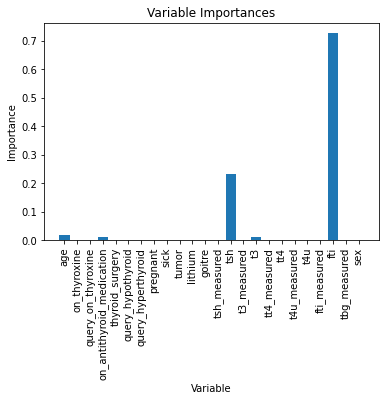

In [315]:
#Visualizing the important features
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');



> The most important features according to random forest are fti, tsh, age, on_thyroxine, t3, on_antithyroid_medication.
The rest are considered not important and have values of 0.0





> I'll repeat the model but with the most important features to see if there'll be any change in it's performance.



In [316]:
#Using the most important features
X = df_health[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = df_health['status']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [317]:
# The random_state variable is here to guarantee that we all see the same numbers.
rfr = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
rfr = rfr.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred1 = rfr.predict(X_test)

In [318]:
#Checking how the score of the model
rfr.score(X_test, y_pred1)

1.0

In [319]:
#Assessing the model
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.012226609664580463
Mean Squared Error: 0.005614634430643004
Root Mean Squared Error: 0.07493086433935621




> **Parameter Tuning**



In [320]:
# Previewing the parameters to tune
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [321]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 40, 50],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 5 and instantiating the model
# 
kfold = KFold(n_splits=5, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 10}


In [322]:

# Applying the best parameters to the model
X = df_health[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = df_health['status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Implementing the model
forest = RandomForestClassifier(n_estimators=40, max_depth=5, random_state = 0)
forest.fit(X_train, y_train)

# Making predictions
y_pred = forest.predict(X_test)


In [323]:
#Checking the model score
score = forest.score(X_test, y_pred)
print('The score of the model is:', score)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

The score of the model is: 1.0
Mean Absolute Error: 0.006472491909385114
Mean Squared Error: 0.006472491909385114
Root Mean Squared Error: 0.08045179867091297




> From the Root mean squared error, the tuned parameter random forest model performed better with an RMSE of 0.08045179867091297. Both the models had an accuracy score of 1 and this is shows that there was overfitting.



## Gradient Boost





In [324]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

X = df_health.drop('status',axis=1)
y = df_health['status']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= df_final['status'])

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.4, max_depth=4)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

#Getting the score(most likely R2)
gbr.score(X_test, y_test)

Mean Absolute Error: 0.0016181229773462784
Mean Squared Error: 0.0016181229773462784
Root Mean Squared Error: 0.040225899335456484


0.9983818770226537



> **Parameter Tuning**



In [325]:
# Previewing the parameters to tune
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [326]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 40, 50],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = GradientBoostingClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 20}


In [327]:

# Applying the best parameters to the model
# Selecting only important features and the y variable
X = df_health[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = df_health['status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Implementing the model
gbr = GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_depth=4)
gbr = gbr.fit(X_train, y_train)

# Making predictions
y_pred_gbr = gbr.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

#Getting the score
gbr.score(X_test, y_test)

Mean Absolute Error: 0.0372168284789644
Mean Squared Error: 0.0372168284789644
Root Mean Squared Error: 0.19291663608658638


0.9627831715210357



> The tuned gradient boost also performed better. Also, compared to random forest, the model performed better with an RMSE of 0.19291663608658638, the accuracy also improved to 96% which showed the reduction of overfitting, though not by much.



# Support Vector Machine

In [328]:
#I'll create a new dataset from the most important features and the target features
df_new = df_final[['status', 'fti', 'tsh', 'age', 'on_thyroxine', 't3', 'on_antithyroid_medication']]

In [329]:
df_new.describe()

,status,fti,tsh,age,on_thyroxine,t3,on_antithyroid_medication
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,0.954310,115.449449,5.475049,51.096565,0.144524,1.384316,0.013610
std,0.208846,57.784733,22.219033,17.854474,0.351677,0.921946,0.115883
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,92.000000,0.000000,38.000000,0.000000,1.000000,0.000000
50%,1.000000,110.000000,1.000000,51.000000,0.000000,1.000000,0.000000
75%,1.000000,126.000000,5.000000,64.000000,0.000000,2.000000,0.000000
max,1.000000,881.000000,530.000000,98.000000,1.000000,10.000000,1.000000


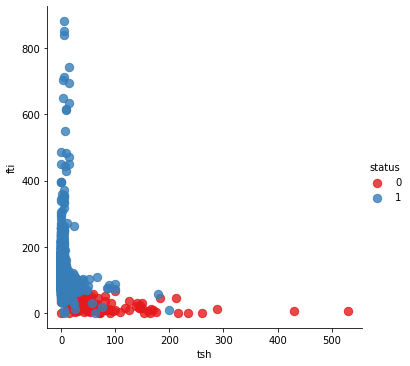

In [330]:
# Plotting our desired features
sns.lmplot('tsh','fti', data=df_new, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})



## **Fitting the model: Linear Kernel**



In [331]:
# Specify the input for the model
X = df_final[['tsh', 'fti']].values

#Specifying our target column
y = df_final['status']

# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(X,y)

In [332]:
# Normalization
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)



> **Visualizing**



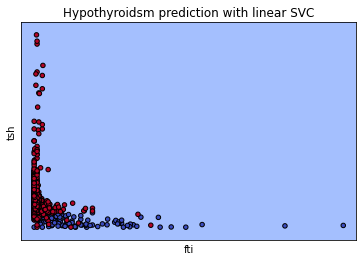

In [333]:
import matplotlib.pyplot as plt
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroidsm prediction with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('tsh')
ax.set_xlabel('fti')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [334]:
# FUnction that predict whether a person has hypothyroidsm or not
def hypothyroidsm_or_negative(tsh, fti):
    if(model.predict([[tsh, fti]]))==0:
        print('The symptoms indicate hypothroidsm!')
    elif(model.predict([[tsh,fti]]))==1:
        print('The symptoms do not indicate hypothroidsm!')

# Predict if symptoms indicate hypothyroidsm or not
hypothyroidsm_or_negative(500, 800)

The symptoms do not indicate hypothroidsm!


In [335]:
# FUnction that predict whether a person has hypothyroidsm or not
def hypothyroidsm_or_negative(tsh, fti):
    if(model.predict([[tsh, fti]]))==0:
        print('The symptoms indicate hypothroidsm!')
    elif(model.predict([[tsh,fti]]))==1:
        print('The symptoms do not indicate hypothroidsm!')

# Predict if symptoms indicate hypothyroidsm or not
hypothyroidsm_or_negative(10, 0)

The symptoms indicate hypothroidsm!


In [336]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9935275080906149

## Fitting the model : Radial basis function (rbf)

In [342]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma=1)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [346]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))

0.9579288025889967


In [339]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
pcf_model = polyclassifier.fit(X_train, y_train)

In [341]:
# making prediction
y_pred = polyclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))

0.982200647249191


## Fitting the model: Polynomial Kernel

In [347]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [349]:
# making prediction
y_pred = polyclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))

0.982200647249191




> **Parameter Tuning**



In [356]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
svm_pred = final_model.predict(X_test)

Best score for training data: 0.9833860278719893 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [357]:
X = df_new[['tsh', 'fti']].values
y = df_new['status']


# Standardising features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Instantiating the model with optimal features
#
svc = SVC(C = 1000, gamma = 0.001, kernel='rbf')
svc.fit(X_train, y_train)

# Making predictions
#
y_pred = svc.predict(X_test)

# Measuring the accuracy of the model
print( accuracy_score(y_test, y_pred))

0.9838187702265372




> Rbf performed the best among all Kernels with an accuracy score of 95%. After tuning, the final model had a score of 98% which still showed overfitting.



# Recommendations

## Follow up questions 



> a). Did we have the right data? Yes. Our data had sufficient number of columns and rows

> b). Do we need other data to answer our questions? Yes. The data was imbalanced and if it had equal numbers of positive and negative hypothyroidsm results then the model would have done better

> c). Did we have the right question? Yes. 





